## Objectives : Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’.

# Step 1 : Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

# Step 2 : Data Import

In [2]:
data = pd.read_csv(r"C:\Users\akash\OneDrive\Desktop\Python\Machine Learning---- Python\Projects\HR-Employee-Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,2,Female,94,...,4,Single,5993,19479,Yes,11,3,8,6,0
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,3,Male,61,...,2,Married,5130,24907,No,23,4,10,10,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,Male,92,...,3,Single,2090,2396,Yes,15,3,7,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,4,Female,56,...,3,Married,2909,23159,Yes,11,3,8,8,3
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,1,Male,40,...,2,Married,3468,16632,No,12,3,6,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,Medical,3,Male,41,...,4,Married,2571,12290,No,17,3,17,5,0
1466,39,No,Travel_Rarely,613,Research & Development,6,Medical,4,Male,42,...,1,Married,9991,21457,No,15,3,9,7,1
1467,27,No,Travel_Rarely,155,Research & Development,4,Life Sciences,2,Male,87,...,2,Married,6142,5174,Yes,20,4,6,6,0
1468,49,No,Travel_Frequently,1023,Sales,2,Medical,4,Male,63,...,2,Married,5390,13243,No,14,3,17,9,0


# Step 3 : Data Pre-Processing
* Data Type and conversion.
* Identifying & Treatment Missing Values.
* Identifying & Treatment of Outliers.

### Data Type and conversion

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   DailyRate                1470 non-null   int64 
 4   Department               1470 non-null   object
 5   DistanceFromHome         1470 non-null   int64 
 6   EducationField           1470 non-null   object
 7   EnvironmentSatisfaction  1470 non-null   int64 
 8   Gender                   1470 non-null   object
 9   HourlyRate               1470 non-null   int64 
 10  JobRole                  1470 non-null   object
 11  JobSatisfaction          1470 non-null   int64 
 12  MaritalStatus            1470 non-null   object
 13  MonthlyIncome            1470 non-null   int64 
 14  MonthlyRate              1470 non-null  

### Univariate Analysis

In [4]:
data.describe()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.721769,65.891156,2.728571,6502.931293,14313.103401,15.209524,3.153741,11.279592,7.008163,2.187755
std,9.135373,403.509100,8.106864,1.093082,20.329428,1.102846,4707.956783,7117.786044,3.659938,0.360824,7.780782,6.126525,3.222430
min,18.000000,102.000000,1.000000,1.000000,30.000000,1.000000,1009.000000,2094.000000,11.000000,3.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,48.000000,2.000000,2911.000000,8047.000000,12.000000,3.000000,6.000000,3.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,66.000000,3.000000,4919.000000,14235.500000,14.000000,3.000000,10.000000,5.000000,1.000000
75%,43.000000,1157.000000,14.000000,4.000000,83.750000,4.000000,8379.000000,20461.500000,18.000000,3.000000,15.000000,9.000000,3.000000
max,60.000000,1499.000000,29.000000,4.000000,100.000000,4.000000,19999.000000,26999.000000,25.000000,4.000000,40.000000,40.000000,15.000000


In [5]:
data.shape

(1470, 21)

#### In Dataset There Are 1470 Rows And 35 Columns Are Present.

In [6]:
data.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
DailyRate                  0
Department                 0
DistanceFromHome           0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
HourlyRate                 0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
MonthlyRate                0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
TotalWorkingYears          0
YearsAtCompany             0
YearsSinceLastPromotion    0
dtype: int64

#### There Is No Any Missing Values In Data.

### Identifying & Treatment of Outliers

<AxesSubplot:>

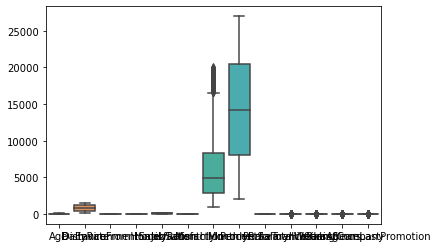

In [7]:
sns.boxplot(data = data)

### Removing Outliers By Using Winsorizing Technique

In [8]:
def outliers(data):
    a = data.select_dtypes(include = [np.number]).columns.tolist()
    for i in a:
        q1 = data[i].quantile(0.25)
        q3 = data[i].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3+1.5*iqr
        lower_limit = q1-1.5*iqr
        data[i] = np.where(data[i]>upper_limit,upper_limit,data[i])
        data[i] = np.where(data[i]<lower_limit,lower_limit,data[i])

In [9]:
outliers(data)

<AxesSubplot:>

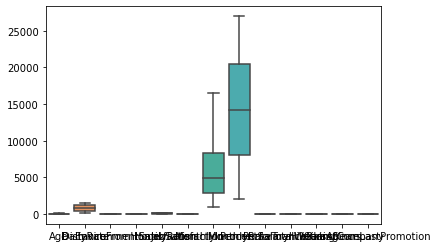

In [10]:
sns.boxplot(data = data)

### Here We Successfully Remove The Outliers.

In [11]:
data.Attrition.value_counts(dropna=False)

No     1233
Yes     237
Name: Attrition, dtype: int64

In [12]:
((1233)/1470)*100

83.87755102040816

### 83.87 % Employees are not leaving the company or not leaving the organization.

# Step 4 : Data Visualization

#### Bad Rate Analysis

In [13]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [14]:
((237/1470)*100)

16.122448979591837

#### 16.12 % Employees are leaving the company or leaving the organization for any reason.

In [15]:
import plotly.express as px

fig = px.pie(data,names='Attrition',color='Attrition',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

# Reject Employee data = Bad Employee

In [16]:
data_Yes= data[data["Attrition"] == "Yes"] 

data_Yes

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
0,41.0,Yes,Travel_Rarely,1102.0,Sales,1.0,Life Sciences,2.0,Female,94.0,...,4.0,Single,5993.0,19479.0,Yes,11.0,3.0,8.0,6.0,0.0
2,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2.0,Other,4.0,Male,92.0,...,3.0,Single,2090.0,2396.0,Yes,15.0,3.0,7.0,0.0,0.0
14,28.0,Yes,Travel_Rarely,103.0,Research & Development,24.0,Life Sciences,3.0,Male,50.0,...,3.0,Single,2028.0,12947.0,Yes,14.0,3.0,6.0,4.0,0.0
21,36.0,Yes,Travel_Rarely,1218.0,Sales,9.0,Life Sciences,3.0,Male,82.0,...,1.0,Single,3407.0,6986.0,No,23.0,3.0,10.0,5.0,0.0
24,34.0,Yes,Travel_Rarely,699.0,Research & Development,6.0,Medical,2.0,Male,83.0,...,1.0,Single,2960.0,17102.0,No,11.0,3.0,8.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23.0,Yes,Travel_Frequently,638.0,Sales,9.0,Marketing,4.0,Male,33.0,...,1.0,Married,1790.0,26956.0,No,19.0,3.0,1.0,1.0,1.0
1442,29.0,Yes,Travel_Rarely,1092.0,Research & Development,1.0,Medical,1.0,Male,36.0,...,4.0,Married,4787.0,26124.0,Yes,14.0,3.0,4.0,2.0,2.0
1444,56.0,Yes,Travel_Rarely,310.0,Research & Development,7.0,Technical Degree,4.0,Male,72.0,...,3.0,Married,2339.0,3666.0,No,11.0,3.0,14.0,10.0,7.5
1452,50.0,Yes,Travel_Frequently,878.0,Sales,1.0,Life Sciences,2.0,Male,94.0,...,3.0,Divorced,6728.0,14255.0,No,12.0,3.0,12.0,6.0,0.0


In [17]:
fig = px.sunburst(data_Yes, path=["Gender",'Department','EducationField',
                                    'Attrition','BusinessTravel'])
fig.show()

# Step 5 : Breaking Data into Two Parts
* Quantitative Variable
* Qualitative Variable

In [18]:
data.select_dtypes(include=[np.number]).columns.tolist()

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsSinceLastPromotion']

In [19]:
Quantitative_Variable = data[data.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
0,41.0,1102.0,1.0,2.0,94.0,4.0,5993.0,19479.0,11.0,3.0,8.0,6.0,0.0
1,49.0,279.0,8.0,3.0,61.0,2.0,5130.0,24907.0,23.0,3.0,10.0,10.0,1.0
2,37.0,1373.0,2.0,4.0,92.0,3.0,2090.0,2396.0,15.0,3.0,7.0,0.0,0.0


In [20]:
Qualitative_Variable = data[data.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes


## Converting qualitative Variable into number

In [21]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1,2,2,1,0,7,2,1
1,0,1,1,1,1,6,1,0
2,1,2,1,4,1,2,2,1
3,0,1,1,1,0,6,1,1
4,0,2,1,3,1,2,1,0


## Combining the data set

In [22]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DailyRate,...,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
0,1,2,2,1,0,7,2,1,41.0,1102.0,...,2.0,94.0,4.0,5993.0,19479.0,11.0,3.0,8.0,6.0,0.0
1,0,1,1,1,1,6,1,0,49.0,279.0,...,3.0,61.0,2.0,5130.0,24907.0,23.0,3.0,10.0,10.0,1.0
2,1,2,1,4,1,2,2,1,37.0,1373.0,...,4.0,92.0,3.0,2090.0,2396.0,15.0,3.0,7.0,0.0,0.0
3,0,1,1,1,0,6,1,1,33.0,1392.0,...,4.0,56.0,3.0,2909.0,23159.0,11.0,3.0,8.0,8.0,3.0
4,0,2,1,3,1,2,1,0,27.0,591.0,...,1.0,40.0,2.0,3468.0,16632.0,12.0,3.0,6.0,2.0,2.0


# Step 6 : Data Partition

In [23]:
from sklearn.model_selection import train_test_split

X = Final_combined.drop('Attrition', axis = 1)
Y = Final_combined[['Attrition']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=100)

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=20, # make 20 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=50,
                       min_samples_split=100, n_estimators=20)

## Importance Features

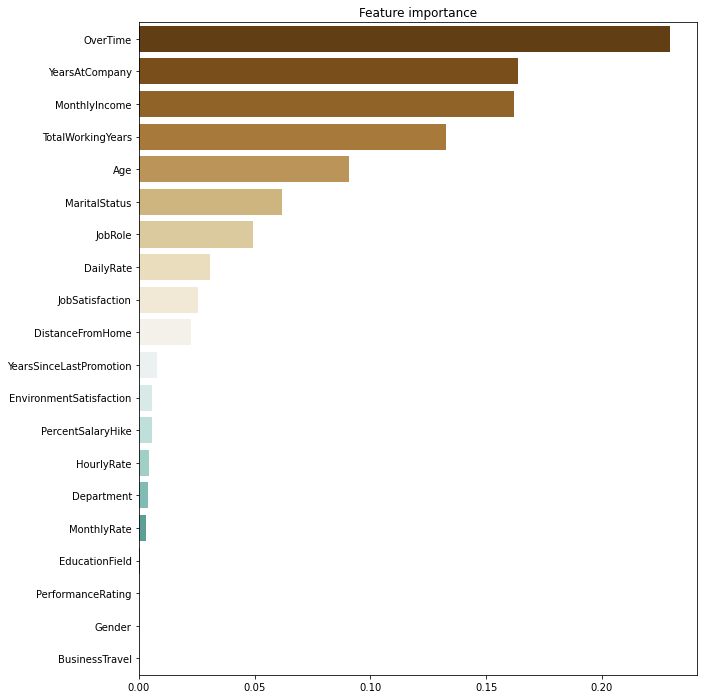

In [25]:
imp = pd.Series(data=Model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')


# Step 7 : Random Forest Visualization

In [26]:
from sklearn.tree import export_graphviz
import pydot

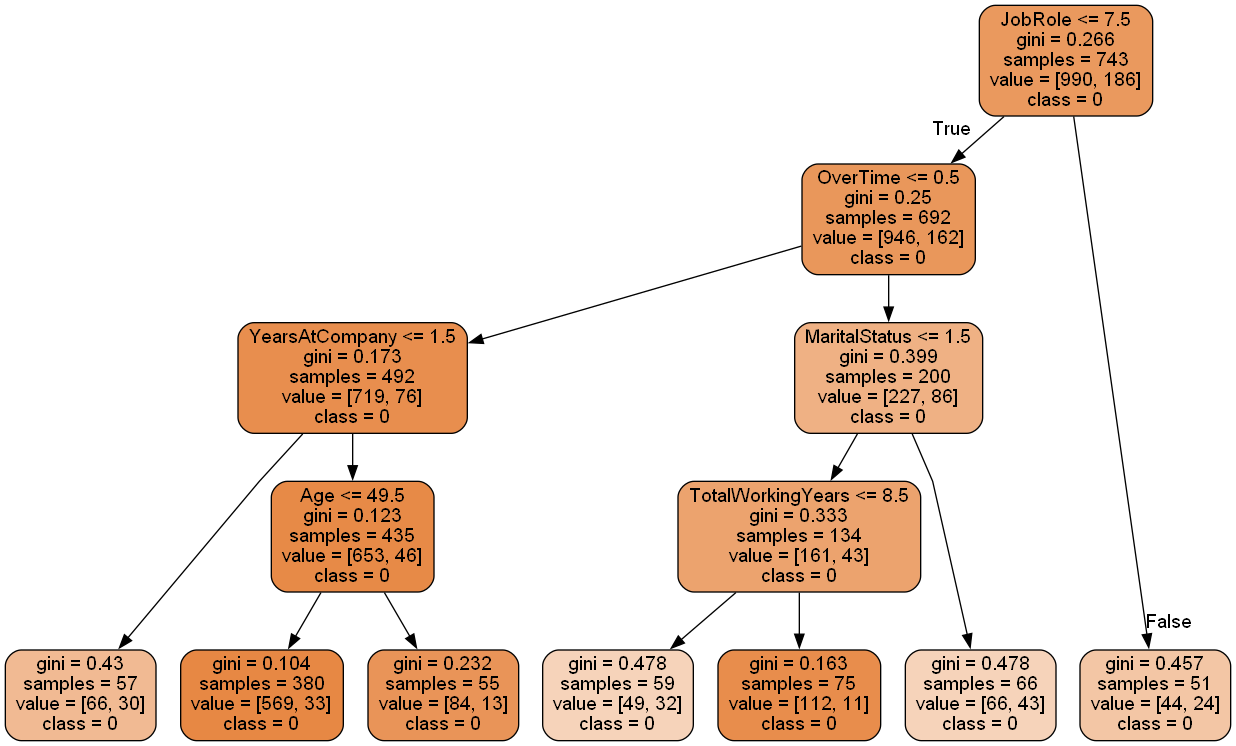

In [27]:
tree = Model.estimators_[1]  # specify the tree number   
Attrition=['0','1'] 
# Export the image to a dot file
feature_list = list(X.columns)  # all variable name
export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                class_names=Attrition,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('abc.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

# Step 8 : Predictions on Train Dataset

In [28]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DailyRate,DistanceFromHome,...,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Attrition
1361,1,1,4,1,2,1,0,26.0,1096.0,6.0,...,61.0,4.0,2544.0,7102.0,18.0,3.0,8.0,7.0,7.0,0
610,2,1,5,1,5,0,1,27.0,269.0,5.0,...,42.0,4.0,12808.0,8842.0,16.0,3.0,9.0,9.0,0.0,0
542,2,1,1,0,4,2,1,38.0,168.0,1.0,...,81.0,3.0,7861.0,15397.0,14.0,3.0,10.0,1.0,0.0,0
950,0,2,1,0,7,0,1,31.0,587.0,2.0,...,57.0,3.0,9852.0,8935.0,19.0,3.0,10.0,10.0,7.5,0
344,2,1,5,1,4,2,0,35.0,1296.0,5.0,...,62.0,2.0,8095.0,18264.0,13.0,3.0,17.0,16.0,0.0,0


In [29]:
train['Predicted']=Model.predict(X_train)
train.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DailyRate,DistanceFromHome,...,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Attrition,Predicted
1361,1,1,4,1,2,1,0,26.0,1096.0,6.0,...,4.0,2544.0,7102.0,18.0,3.0,8.0,7.0,7.0,0,0
610,2,1,5,1,5,0,1,27.0,269.0,5.0,...,4.0,12808.0,8842.0,16.0,3.0,9.0,9.0,0.0,0,0
542,2,1,1,0,4,2,1,38.0,168.0,1.0,...,3.0,7861.0,15397.0,14.0,3.0,10.0,1.0,0.0,0,0
950,0,2,1,0,7,0,1,31.0,587.0,2.0,...,3.0,9852.0,8935.0,19.0,3.0,10.0,10.0,7.5,0,0
344,2,1,5,1,4,2,0,35.0,1296.0,5.0,...,2.0,8095.0,18264.0,13.0,3.0,17.0,16.0,0.0,0,0


# Step 9 : Model Performance Metrics

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Attrition'], train['Predicted'])
print(confusion_matrix)

[[986   0]
 [190   0]]


In [31]:
from sklearn.metrics import classification_report
print(classification_report(train['Attrition'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       986
           1       0.00      0.00      0.00       190

    accuracy                           0.84      1176
   macro avg       0.42      0.50      0.46      1176
weighted avg       0.70      0.84      0.76      1176



# Step 10 : Predictions on Test Dataset

In [32]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DailyRate,DistanceFromHome,...,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Attrition
880,1,1,4,0,2,1,0,32.0,116.0,13.0,...,77.0,2.0,2743.0,7331.0,20.0,3.0,2.0,2.0,2.0,0
152,2,2,2,1,8,1,1,53.0,1436.0,6.0,...,34.0,3.0,2306.0,16047.0,20.0,3.0,13.0,7.0,4.0,0
1466,2,1,3,1,0,1,0,39.0,613.0,6.0,...,42.0,1.0,9991.0,21457.0,15.0,3.0,9.0,7.0,1.0,0
1084,2,2,5,1,7,1,1,34.0,971.0,1.0,...,64.0,3.0,7083.0,12288.0,14.0,3.0,10.0,10.0,7.5,0
1086,1,1,3,1,5,2,1,50.0,333.0,22.0,...,88.0,4.0,14411.0,24450.0,13.0,3.0,28.5,18.0,7.5,0


In [33]:
test['Predicted']=Model.predict(X_test)
test.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DailyRate,DistanceFromHome,...,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Attrition,Predicted
880,1,1,4,0,2,1,0,32.0,116.0,13.0,...,2.0,2743.0,7331.0,20.0,3.0,2.0,2.0,2.0,0,0
152,2,2,2,1,8,1,1,53.0,1436.0,6.0,...,3.0,2306.0,16047.0,20.0,3.0,13.0,7.0,4.0,0,0
1466,2,1,3,1,0,1,0,39.0,613.0,6.0,...,1.0,9991.0,21457.0,15.0,3.0,9.0,7.0,1.0,0,0
1084,2,2,5,1,7,1,1,34.0,971.0,1.0,...,3.0,7083.0,12288.0,14.0,3.0,10.0,10.0,7.5,0,0
1086,1,1,3,1,5,2,1,50.0,333.0,22.0,...,4.0,14411.0,24450.0,13.0,3.0,28.5,18.0,7.5,0,0


# Step 11 : Model Performance Metrics on Test data

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Attrition'])
print(confusion_matrix)

[[247  47]
 [  0   0]]


In [35]:
from sklearn.metrics import classification_report
print(classification_report(test['Attrition'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294



### Here The Accuracy Of Test Data is 84% So We Can Say That Our Model Is Good Fit.

# Finish...!